# **CS 4361/5361 Machine Learning**

**Practice Exam 1, Part 2**

**Author:** [Olac Fuentes](http://www.cs.utep.edu/ofuentes/)<br>


Your task is to write programs to determine if a digit from the MNIST dataset has been flipped vertically. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix
import time

Download data.

In [24]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Subsample the data to make running times of classifiers more manageable.

In [25]:
x_train = x_train[::5]
y_train = y_train[::5]
x_test = x_test[::5]
y_test = y_test[::5]

Flip some of the examples vertically

In [26]:
f = np.random.random(size=x_train.shape[0])
x_train[f>0.7] = x_train[f>0.7,:,::-1]
y_train = np.int16(f>0.7)
f = np.random.random(size=x_test.shape[0])
x_test[f>0.7] = x_test[f>0.7,:,::-1]
y_test = np.int16(f>0.7)


Class: 0


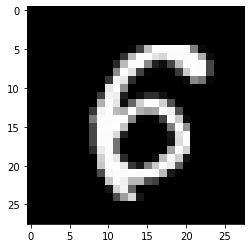

Class: 0


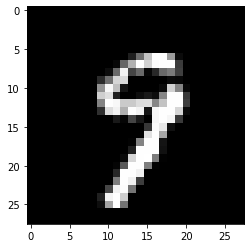

Class: 0


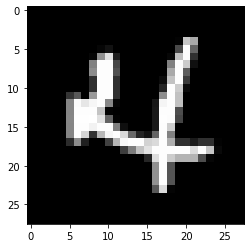

Class: 0


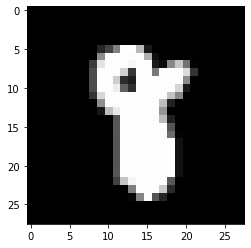

Class: 1


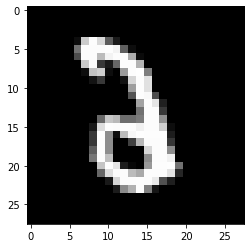

Class: 0


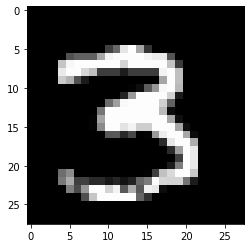

Class: 0


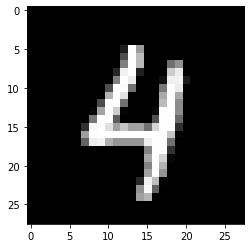

Class: 0


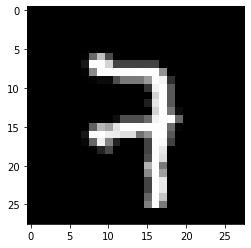

Class: 0


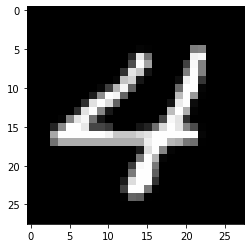

Class: 0


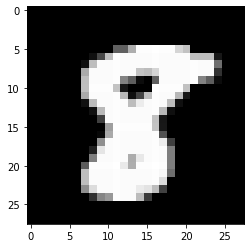

In [27]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(10):
  im = np.random.randint(0,x_train.shape[0])
  plt.imshow(x_train[im],cmap='gray')
  print('Class:',y_train[im])
  plt.show()

Now let's convert them to row form, as usual. 

In [28]:
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1)
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)

**Question 1.** 
Write a classifier that simply predict the majority class in the training set as the class for all test examples and compute its accuracy.


In [33]:
def majority(y_test):
  majority = np.zeros_like(y_test)
  return accuracy_score(majority,y_test)

print(majority(y_test))

0.687


**Question 2.** 
Write a program to compare the performance of the k-nearest-neighbors classifier, random forest classifier and multilayer perceptron in this problem.


In [39]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
pred = model.predict(x_test)
KNaccuracy = accuracy_score(pred , y_test)

In [40]:
print(KNaccuracy)

0.965


In [41]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 50)
RF.fit(x_train, y_train)
pred = RF.predict(x_test)
RFaccuracy = accuracy_score(pred , y_test)

In [42]:
print(accuracy)

0.948


In [46]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
PCaccuracy = accuracy_score(pred , y_test)
print(PCaccuracy)

0.982
